# Hands-on session on genome mining

The goal of this tutorial is to provide a brief introduction to bioinformatic approaches for genome mining. 

The index of these notebook includes:

1. [Gene annotation](#1.-Gene-annotation)
2. [Alignment-based approaches](#2.-Alignment-based-approaches)
    2.extra. [Genome-scale Metabolic Models](#2.5.-GEMs)
3. [HMMs-based approaches](#3.-HMMs-based-approaches)
4. [Feature-based approaches](#4.-Feature-based-approaches)

**Notes on notebooks usage**

You are working in a `jupyter notebook`. These documents allow to both write executable code, for example in `python`, and document it using `markdown` in different `cells`. 

Some useful shortcuts include:
- Shift+Enter : execute cell
- Esc, b : add a cell below
- Esc, a : add a cell above
- Esc, m : transform cell to `markdown`
- Esc, d : delete cell

## Additional information

- This material has been prepared by [Samuel Miravet-Verde](mailto:samuelmiver@gmail.com).
- In some cases, I have taken inspiration or even examples from very clever people in the field, in those cases, the links and references will be present in the respective sections of the notebooks. 

Material:

- This material is complementary to theoretical content included in [this presentation](https://docs.google.com/presentation/d/1iad5MKHSTRdqDJgdIiTemxh5WUb9z7kTxrSJEfBV_tU/edit?usp=sharing).
- This notebook is part of [this repository](https://github.com/franciscozorrilla/microbial_community_genomics.git).

**Latest update**: 2025/03/11

## To run in google colab:

In [ ]:
# Get access to data
!git clone https://github.com/franciscozorrilla/microbial_community_genomics.git

# Install some libraries in our colab folder (important libraries such as numpy, pandas, etc. are already installed!)
!pip install Bio pyhmmer==0.10.11 peptides==0.3.4 cobra==0.27 networkx

# Set data path
DATA = '/content/microbial_community_genomics/data' # From now on you can access data folder from the DATA variable

---------- 

# 1. Gene annotation 

This section will introduce you to sequence handling in Python, covering DNA, RNA, proteins, and coding a basic Open Reading Frame (ORF) finder. By the end, you'll be familiar with using Biopython for sequence manipulation and creating a simple ORF detection function.

Core Concepts
- DNA (Deoxyribonucleic Acid): The molecular blueprint of organisms. Consists of nucleotides represented by the letters A, T, C, and G.
- RNA (Ribonucleic Acid): Transcribed from DNA and serves as a template for protein synthesis. It contains U (Uracil) instead of T.
- Protein: Composed of amino acids, translated from RNA through codons (triplets of nucleotides).
- Open Reading Frames (ORFs): DNA segments that have the potential to code for proteins. ORFs start with a start codon (usually ATG) and end with a stop codon (e.g., TAA, TAG, TGA).

![title](img/orf.png)


## 1.1. Working with DNA Sequences in Python

First, let's load and manipulate DNA sequences using basic Python functions and Biopython.
Example DNA Sequence

Let's start with a small sample DNA sequence:

In [ ]:
sample_dna = "ATGCGATACGCTTGA"

Task 1: Converting DNA to RNA

To convert DNA to RNA, replace thymine (T) with uracil (U).

## 1.2. Basic ORF Finder

An ORF finder identifies sequences between a start codon (ATG) and a stop codon (TAA, TAG, TGA). Here’s a simple function to find ORFs:

In [ ]:
def find_orfs(dna_sequence):
    """ 
    This function scans the sequence for ATG, then continues 
    in triplets until it finds a stop codon. 
    It then extracts and saves each ORF. 
    """
    start_codon = "ATG"
    stop_codons = ["TAA", "TAG", "TGA"]
    orfs = []

    for i in range(len(dna_sequence) - 2):
        # Check for start codon
        if dna_sequence[i:i+3] == start_codon:
            for j in range(i+3, len(dna_sequence) - 2, 3):
                # Check for stop codon
                if dna_sequence[j:j+3] in stop_codons:
                    orfs.append(dna_sequence[i:j+3])
                    break
    return orfs

# Test the ORF finder with the sample DNA
orfs = find_orfs(sample_dna)
print("ORFs Found:")
for orf in orfs:
    print(orf)


**Exercise**: go together through the previous function and understand it

## 1.3. Using Biopython for Sequence Handling

Biopython’s Seq object offers powerful tools for sequence manipulation. Here’s how to create sequences and translate them to protein sequences.
Example: Creating and Translating a Sequence

In [ ]:
from Bio.Seq import Seq

# Create a Seq object
dna_seq = Seq("ATGCGTCTAA")

# Translate the DNA sequence to a protein
protein_seq = dna_seq.translate()
print(f"Protein Sequence: {protein_seq}")


## 1.4. Loading a genome with Biopython

In [ ]:
from Bio import SeqIO

# Load the sequence from a FASTA file
with open(f"{DATA}/test_genome.fna") as file:
    sequence_record = SeqIO.read(file, "fasta")

# Display the sequence and its metadata
print(f"ID: {sequence_record.id}")
print(f"Description: {sequence_record.description}")
print(f"Sequence: {sequence_record.seq}")


## 1.5. Putting It All Together

Here’s a final example combining all the steps into a small ORF finder that translates found ORFs into proteins:

In [ ]:
from Bio.Seq import Seq

def find_and_translate_orfs(dna_sequence):
    start_codon = "ATG"
    stop_codons = ["TAA", "TAG", "TGA"]
    orf_proteins = []

    for i in range(len(dna_sequence) - 2):
        if dna_sequence[i:i+3] == start_codon:
            for j in range(i+3, len(dna_sequence) - 2, 3):
                if dna_sequence[j:j+3] in stop_codons:
                    # Convert to Biopython Seq object for easy translation
                    orf_seq = Seq(dna_sequence[i:j+3])
                    orf_proteins.append(orf_seq.translate())
                    break
    return orf_proteins

# Test with a longer DNA sequence
proteins = find_and_translate_orfs(sequence_record.seq)
print("Translated Proteins from ORFs:")
for protein in proteins:
    print(protein)


**Exercise**: go together through the previous function and understand it

## 1.6. Using Biopython for multifasta Handling

In [ ]:
# Install Biopython if needed: !pip install biopython
from Bio.Seq import Seq
from Bio import SeqIO

# Sample DNA sequence
dna_sequence = Seq("ATGCTAGCTAGCTCGTAGCT")
print("Sequence:", dna_sequence)
print("Reverse Complement:", dna_sequence.reverse_complement())
print("Protein Translation:", dna_sequence.translate())

In [ ]:
# Load a FASTA file (replace with actual file path if needed)
for record in SeqIO.parse(f"{DATA}/test_contigs.fna", "fasta"):
    print(f"ID: {record.id}, Length: {len(record.seq)}")

In [ ]:
from Bio import SeqIO
from Bio.Seq import Seq

# Load sequences from a FASTA file into a dictionary
input_file = f"{DATA}/test_contigs.fna"  # Replace with your FASTA file
sequences = {}

for record in SeqIO.parse(input_file, "fasta"):
    dna_seq = record.seq
    revcomp_seq = dna_seq.reverse_complement()
    aa_seq = dna_seq.translate()
    
    # Create a dictionary with the structure {id: [dna_seq, revcomp_seq, aa_seq]}
    sequences[record.id] = [str(dna_seq), str(revcomp_seq), str(aa_seq)]

# Display the resulting dictionary
for id, seq_info in sequences.items():
    print(f"ID: {id}")
    print(f"DNA Sequence: {seq_info[0]}")
    print(f"Reverse Complement: {seq_info[1]}")
    print(f"Protein Sequence: {seq_info[2]}")
    print("------")


**Exercise**: What is the previous code doing?

<details>
Load sequences from a FASTA file into a dictionary, compute the reverse complement, and translate to protein and create a new dictionary with the structure {id:[dna_seq, revcomp_seq, aa_seqs]}
</details>


--------

# 2. Alignment-based approaches

## 2.1. Introduction to Sequence Homology and Identity

Objective: Explain the concepts of homology and sequence identity, crucial in alignment-based approaches.

- Sequence Homology: Similarity due to shared ancestry; can be orthologous (same function in different species) or paralogous (functionally diverged post-duplication).
- Sequence Identity: Percentage of identical residues in the alignment of two sequences, helping to quantify similarity.

Assumption: we can infer function of a protein by homology given with a set of sequences with known functions.

## 2.2. Position weight matrices

In this example we will create a Position Weight Matrix (PWM) for the sequence "AGN[A|G]GG", use it to scan a larger DNA sequence, and plot the probability of finding "AGGAGG" at each position.

**Step 1**: Define the PWM for "AGGAGG"
A Position Weight Matrix quantifies the likelihood of each nucleotide at each position in the motif. For this example, we'll assume a simple PWM based on "AGGAGG" alone, assigning high probabilities to the observed bases in this motif.

In [ ]:
import numpy as np

# Define the target sequence
target_motif = "AGGAGG"

# Define PWM for a motif of 6 bases (length of AGGAGG)
# Rows: A, C, G, T. Columns correspond to each position in "AGGAGG"
pwm = np.array([
    [1, 0.25, 0.5, 0, 1, 0],  # Probability of 'A' at each position
    [0, 0.25, 0  , 0, 0, 0],  # Probability of 'C' at each position
    [0, 0.25, 0.5, 0, 0, 1],  # Probability of 'G' at each position
    [0, 0.25, 0  , 1, 0, 0]   # Probability of 'T' at each position
], dtype=float)

# To handle probabilities in a real PWM, add a small pseudocount to avoid zeros
pwm = (pwm + 0.01) / pwm.sum(axis=0)  # Normalize each column


**Step 2**: Calculate the Match Score for Each Window
Define a function to calculate the probability of observing the pattern in different windows across a larger DNA sequence.

In [ ]:
def calculate_pwm_score(sequence, pwm):
    scores = []
    for i in range(len(sequence) - pwm.shape[1] + 1):
        window = sequence[i:i + pwm.shape[1]]
        score = 1.0
        for j, nucleotide in enumerate(window):
            if nucleotide == 'A':
                score *= pwm[0, j]
            elif nucleotide == 'C':
                score *= pwm[1, j]
            elif nucleotide == 'G':
                score *= pwm[2, j]
            elif nucleotide == 'T':
                score *= pwm[3, j]
        scores.append(score)
    return scores


**Step 3**: Apply the PWM to a Test Sequence
Define a test DNA sequence, apply the PWM, and compute the scores

In [ ]:
# Define a test sequence
test_sequence = "TTTAGGAGGCTAGGAGGATGGAGGTTAGGAGGGT"

# Calculate the scores for each window
scores = calculate_pwm_score(test_sequence, pwm)


**Exercise**: Plot the Probability per Window, how would you interpret this graph?

In [ ]:
import matplotlib.pyplot as plt

# Plot the PWM score across the sequence
plt.figure(figsize=(12, 6))
plt.plot(range(len(scores)), scores, marker='o', color='blue', linestyle='-', linewidth=1)
plt.title("PWM Match Probability for 'AGN[A|G]AGG' in Test Sequence")
plt.xlabel("Position in Sequence")
plt.ylabel("Match Probability")
plt.show()

## 2.3. Running BLAST 

Core Concepts: BLAST (Basic Local Alignment Search Tool) compares sequences to find regions of similarity. We’ll use the Biopython NCBIWWW module to run BLAST against NCBI’s online database.

Note: Running BLAST on NCBI servers may have rate limits. Optionally, download and run BLAST locally for larger datasets.

### 2.3.1 Running BLAST locally

From a terminal you could run the following commands

```{bash}

# Create a dictionary
cd s07_hands_on
mkdir blast_exercise

# Load blast 
ml BLAST+

# Inspect the file to make the database
head -20 ./data/PlasticDB.fasta 

# Make a database
makeblastdb -in ./data/PlasticDB.fasta -dbtype prot -out ./blast_exercise/plasticdb -title plasticdb -parse_seqids

# Run BlastP
blastp -query ./data/omd2_candidate.faa -db ./data/blast_exercise/plasticdb -outfmt 6 -evalue 0.0001 -out ./data/omd2_candidate_blast.out
```

## 2.4. Parsing BLAST Results and Checking Hits with Pandas


In [ ]:
import pandas as pd
# Read the file with pandas and store it in blast_results variable

This seems hard to interpret without a header... 

In [ ]:
blast_results = pd.read_csv(f'{DATA}/omd2_candidate_blast.out', sep='\t', header=None)
blast_results.columns = ["qseqid", "sseqid", "pident", "length", "mismatch", 
                        "gapopen", "qstart", "qend", "sstart", "send", 
                        "evalue", "bitscore"]

In [ ]:
blast_results

**Exercise**:
1. Subset the previous results to get only results with an e-value <0.0000001.
2. Further filter cases with pident >=50 and length >150.
3. How many genes satisfy the condition 1 and 2? 
4. What are the different degrading enzymes identified? 

**Exercise**:

1. Load the genome collection (and metadata) from OMD2
2. Can you identify the genus and species taxonomy of the organism we are analyzing?
3. Would you trust the quality of the genome analyzed? 

**Alternatively**: access microbiomics.io/ocean2 

In [ ]:
import pandas as pd
df = pd.read_csv(f'{DATA}/genome_summary.csv.gz', compression='gzip', index_col=0)
md = pd.read_csv(f'{DATA}/metadata.tsv', sep='\t', index_col=0)

In [ ]:
df

---------

## 2.5. GEMs

In this section we will work with the direct output from carveme and smetana. We will not be running these commands today but learn to read and work programmatically with the output files produced:

### 2.5.1. Running carveme

You need to load carveme first:

```
carve input.faa -o /path/output/name.xml
```

Check the documentation of carveme here: https://carveme.readthedocs.io/en/latest/

### 2.5.2 Exploring models with Cobra

Cobra is a huge library to perform multiple function on metabolic models. 

Check the documentation for cobra.py here: https://cobrapy.readthedocs.io/en/latest/

In [1]:
# The start of everything is reading the model with built-in function:
from cobra.io import read_sbml_model 
btheta = read_sbml_model(f'{DATA}/gem_files/btheta.fa.xml')
btheta

ModuleNotFoundError: No module named 'cobra'

**Exercise** : repeat the previous process assigning the models to `ecoli` and `arect`. How many metabolites, reactions and genes have each model?

In [ ]:
ecoli = read_sbml_model(f'{DATA}/gem_files/ecoli.fa.xml')
arect = read_sbml_model(f'{DATA}/gem_files/arect.fa.xml')


#### 2.5.2.1 Accessing reactions

You can access reactions by index or by name:

In [ ]:
btheta.reactions[50]

Reaction identifier,AACPS4
Name,Acyl-[acyl-carrier-protein] synthetase (n-C16:1)
Memory address,0x7f77e9512a30
Stoichiometry,ACP_c + atp_c + hdcea_c --> amp_c + hdeACP_c + ppi_c Acyl carrier protein + ATP C10H12N5O13P3 + Hexadecenoate (n-C16:1) --> AMP C10H12N5O7P + Cis-hexadec-9-enoyl-[acyl-carrier protein] (n-C16:1) + Diphosphate
GPR,lcl_CP092641_1_prot_UML60641_1_3835
Lower bound,0.0
Upper bound,1000.0


In [ ]:
btheta.reactions.get_by_id('AACPS4')

Reaction identifier,AACPS4
Name,Acyl-[acyl-carrier-protein] synthetase (n-C16:1)
Memory address,0x7fa1b5890c40
Stoichiometry,ACP_c + atp_c + hdcea_c --> amp_c + hdeACP_c + ppi_c Acyl carrier protein + ATP C10H12N5O13P3 + Hexadecenoate (n-C16:1) --> AMP C10H12N5O7P + Cis-hexadec-9-enoyl-[acyl-carrier protein] (n-C16:1) + Diphosphate
GPR,lcl_CP092641_1_prot_UML60641_1_3835
Lower bound,0.0
Upper bound,1000.0


The information of the reaction can be explored as strings:

In [ ]:
acp = btheta.reactions.get_by_id('AACPS4')
print(acp.name)
print(acp.reaction)

Acyl-[acyl-carrier-protein] synthetase  (n-C16:1)
ACP_c + atp_c + hdcea_c --> amp_c + hdeACP_c + ppi_c


We can list all the reactions names in a model using comprehension lists:

In [ ]:
reactions = [i.id for i in btheta.reactions]
reactions[:10]   # Show the 10 first reactions

['12DGR140tipp',
 '12DGR160tipp',
 '12DGR161tipp',
 '12PPDRDH',
 '13PPDH2',
 '13PPDH2_1',
 '14GLUCANabcpp',
 '14GLUCANtexi',
 '24DECOAR',
 '2AGPE120tipp']

In [ ]:
# Useful attributes shared between this object and the following are:
print(btheta.reactions[50].id)
print(btheta.reactions[50].name)
print(btheta.reactions[50].compartments)
print(btheta.reactions[50].reaction)

AACPS4
Acyl-[acyl-carrier-protein] synthetase  (n-C16:1)
{'C_c'}
ACP_c + atp_c + hdcea_c --> amp_c + hdeACP_c + ppi_c


#### 2.5.2.2 Accessing metabolites

In the same way, you can access metabolites:

In [ ]:
btheta.metabolites.get_by_id("atp_c")

Metabolite identifier,atp_c
Name,ATP C10H12N5O13P3
Memory address,0x7f77e97c6d30
Formula,C10H12N5O13P3
Compartment,C_c
In 303 reaction(s),"NAabc, NADS2, UAMAS, NDPK7, RIBabc1, CYTDK1_1, GMPS, RIBabcpp, NAabcO, NDPK8, UAMAGS, ANHMK, XYLBabc, GLYCK_1, PG180abcpp, XYLK, ACTNabc, GLUTRS, PG161abcpp, DTMPK, SULAabc, ASPK, RIBabc,..."


We can print out the metabolite name, formula, compartment (cytosol in this case) directly as string, and charge.

In [ ]:
atp = btheta.metabolites.get_by_id("atp_c")

print(atp.name)
print(atp.formula)
print(atp.compartment)
print(atp.charge)

ATP C10H12N5O13P3
C10H12N5O13P3
C_c
-4


To get the reactions for a metabolite we can combine the previous methods:

In [ ]:
atp_reactions = btheta.metabolites.get_by_id("atp_c").reactions

In [ ]:
len(atp_reactions)

303

A metabolite like glucose 6-phosphate will participate in fewer reactions.


In [ ]:
len(btheta.metabolites.get_by_id("g6p_c").reactions)

9

**Exercise** : check in the BiGG database http://bigg.ucsd.edu/ the symbol for nitrite and check if the three models have this as metabolite

In [ ]:
models = [btheta, ecoli, arect]

no2 = []
for m in models:
    try:
        if m.metabolites.get_by_id('no2_c'):
            no2.append(1)
    except:
        no2.append(0)
no2

NameError: name 'btheta' is not defined

#### 2.5.2.3 Accessing genes

The gene_reaction_rule is a boolean representation of the gene requirements for this reaction to be active.

We will consider the reaction glucose 6-phosphate isomerase, which interconverts glucose 6-phosphate and fructose 6-phosphate. The reaction id for this reaction in our test model is PGI.

In [ ]:
pgi = btheta.reactions.get_by_id("PGI")
pgi

Reaction identifier,PGI
Name,Glucose-6-phosphate isomerase
Memory address,0x7f77d330ac40
Stoichiometry,g6p_c <=> f6p_c D-Glucose 6-phosphate <=> D-Fructose 6-phosphate
GPR,lcl_CP092641_1_prot_UML61488_1_4728
Lower bound,-1000.0
Upper bound,1000.0


In [ ]:
pgi_gene = btheta.genes.get_by_id('lcl_CP092641_1_prot_UML61488_1_4728')
pgi_gene

Gene identifier,lcl_CP092641_1_prot_UML61488_1_4728
Name,G_lcl_CP092641_1_prot_UML61488_1_4728
Memory address,0x7f5e988bb470
Functional,True
In 4 reaction(s),"G6PI, PGI, PGI1c, G6PI3"


Each gene keeps track of the reactions it catalyzes

In [ ]:
pgi_gene.reactions

frozenset({<Reaction G6PI3 at 0x7f5e986d4ef0>,
           <Reaction G6PI at 0x7f5e986dd080>,
           <Reaction PGI1c at 0x7f5e981375f8>,
           <Reaction PGI at 0x7f5e98137438>})

### 2.5.3 Model optimization

Simulations using flux balance analysis can be solved using Model.optimize(). This will maximize or minimize (maximizing is the default) flux through the objective reactions.

In [ ]:
solution = ecoli.optimize()
solution.objective_value

65.78263250682015

In [ ]:
btheta.reactions[0]

Reaction identifier,12DGR120tipp
Name,"1,2 diacylglycerol transport via flipping (periplasm to cytoplasm, n-C12:0)"
Memory address,0x7f5e98d2d278
Stoichiometry,"12dgr120_p --> 12dgr120_c 1,2-Diacyl-sn-glycerol (didodecanoyl, n-C12:0) --> 1,2-Diacyl-sn-glycerol (didodecanoyl, n-C12:0)"
GPR,
Lower bound,0.0
Upper bound,1000.0


Models solved using FBA can be further analyzed by using summary methods, which output printed text to give a quick representation of model behavior. Calling the summary method on the entire model displays information on the input and output behavior of the model (uptake and secretion), along with the optimized objective.

In [ ]:
summary = ecoli.summary()
summary

Metabolite,Reaction,Flux,C-Number,C-Flux
4abzglu_e,EX_4abzglu_e,0.04401,12,0.00%
LalaDgluMdap_e,EX_LalaDgluMdap_e,6.578,15,0.88%
adn_e,EX_adn_e,13.45,10,1.20%
akg_e,EX_akg_e,642.2,5,28.63%
arbt6p_e,EX_arbt6p_e,0.04401,12,0.00%
arg__L_e,EX_arg__L_e,19.46,6,1.04%
asn__L_e,EX_asn__L_e,15.86,4,0.57%
ca2_e,EX_ca2_e,0.3424,0,0.00%
cl_e,EX_cl_e,0.3424,0,0.00%
cobalt2_e,EX_cobalt2_e,0.006578,0,0.00%


Secreted metabolites and those that are externally required can be accessed from these summaries:

In [ ]:
ecoli.summary().secretion_flux.sort_values('flux', ascending=False)

,flux,reaction,metabolite
EX_12ppd__R_e,0.000000,EX_12ppd__R_e,12ppd__R_e
EX_mcbtt_e,0.000000,EX_mcbtt_e,mcbtt_e
EX_metsox_S__L_e,0.000000,EX_metsox_S__L_e,metsox_S__L_e
EX_metsox_R__L_e,0.000000,EX_metsox_R__L_e,metsox_R__L_e
EX_metglcur_e,0.000000,EX_metglcur_e,metglcur_e
...,...,...,...
EX_ala__L_e,-850.991319,EX_ala__L_e,ala__L_e
EX_h2o_e,-893.164342,EX_h2o_e,h2o_e
EX_pi_e,-985.762139,EX_pi_e,pi_e
EX_succ_e,-1000.000000,EX_succ_e,succ_e


In [ ]:
ecoli.summary().uptake_flux

,flux,reaction,metabolite
EX_4abzglu_e,0.044009,EX_4abzglu_e,4abzglu_e
EX_LalaDgluMdap_e,6.578263,EX_LalaDgluMdap_e,LalaDgluMdap_e
EX_adn_e,13.445773,EX_adn_e,adn_e
EX_akg_e,642.229964,EX_akg_e,akg_e
EX_arg__L_e,19.457976,EX_arg__L_e,arg__L_e
EX_asn__L_e,15.857232,EX_asn__L_e,asn__L_e
EX_ca2_e,0.342399,EX_ca2_e,ca2_e
EX_cl_e,0.342399,EX_cl_e,cl_e
EX_cobalt2_e,0.006578,EX_cobalt2_e,cobalt2_e
EX_cu2_e,0.046640,EX_cu2_e,cu2_e


**Exercise** : Which organism requires more external compounds? 

Hint: you can use .shape in a dataframe to retrieve (nr_rows, nr_columns)


In [ ]:
for m in models:
    print(m.id, m.summary().uptake_flux.shape[0])

btheta_fa 46
arect_fa 36
ecoli_fa 47


**Exercise** : List the external compounds required by E. coli

Hint: you can use access the dataframe[column_name]

In [ ]:
print(list(ecoli.summary().uptake_flux['metabolite']))

['4abzglu_e', 'LalaDgluMdap_e', 'adn_e', 'akg_e', 'arg__L_e', 'asn__L_e', 'ca2_e', 'cl_e', 'cobalt2_e', 'cu2_e', 'cytd_e', 'dcyt_e', 'fe2_e', 'fe3_e', 'g3ps_e', 'gam6p_e', 'gln__L_e', 'glu__L_e', 'gly_e', 'glyc3p_e', 'gsn_e', 'his__L_e', 'ile__L_e', 'indole_e', 'k_e', 'leu__L_e', 'lys__L_e', 'met__L_e', 'mg2_e', 'minohp_e', 'mn2_e', 'nmn_e', 'no2_e', 'no3_e', 'o2_e', 'phe__L_e', 'pnto__R_e', 'pro__L_e', 's_e', 'skm_e', 'so4_e', 'thm_e', 'thr__L_e', 'thymd_e', 'tyr__L_e', 'val__L_e', 'zn2_e']


This is useful in adjusting metabolic models to simulate conditions such as deletions of genes or adding a specific compound to the media. 

Usually, this would be performed editing the model, then optimizing, then comparing with the original model. Editing models is out of the scope of this BC but we can use carveme to run similar processes automatically without editing the models themselves.

#### 2.5.3.1 Gap Filling: 

##### 2.5.3.2 Example of model optimization in specific media conditions

Here we use CarveMe to predict the uptake and secretion capabilities of an organism only from genetic evidence, and to produce a simulation-ready model without gap-filling for any particular media.

However, there are situations where you want to guarantee that the model is able to reproduce growth in one, or several, experimentally verified media.

For instance, you can ensure the model reproduces growth on M9 and LB media:

```bash
carve /input/faa/ -o /path/output/name.xml --gapfill M9
```

or short version:

```bash
carve /input/faa/ -o /path/output/name.xml -g M9
```

**Note**: CarveMe includes different media compositions but the user can specify custom media, check here https://carveme.readthedocs.io/en/latest/advanced.html#media-database to learn how to specify your own media compositions. 

Run the following commands from the terminal:

```bash
carve ./faa_files/btheta.fa -o ./gem_media_files/btheta_m9lb.xml -g M9,LB
carve ./faa_files/arect.fa -o ./gem_media_files/arect_m9lb.xml -g M9,LB
carve ./faa_files/ecoli.fa -o ./gem_media_files/ecoli_m9lb.xml -g M9,LB
```

Now we can explore the produce models to check which 'gaps' have been filled:

In [ ]:
# We can cross link lists using zip()
import glob
for original_model, gapfill_model in zip(glob.glob(f'{DATA}/gem_files/*.xml'), 
                                         glob.glob(f'{DATA}/gem_media_files/*.xml')):
    print(original_model, gapfill_model)

./hands_on_files/gem_files/arect.fa.xml ./hands_on_files/gem_media_files/arect_m9lb.xml
./hands_on_files/gem_files/btheta.fa.xml ./hands_on_files/gem_media_files/btheta_m9lb.xml
./hands_on_files/gem_files/ecoli.fa.xml ./hands_on_files/gem_media_files/ecoli_m9lb.xml


**Exercise** : Go together along the following code and understand what is every line doing

In [ ]:
for original_model, gapfill_model in zip(glob.glob(f'{DATA}/gem_files/*.xml'), 
                                         glob.glob(f'{DATA}/gem_media_files/*.xml')):
    organism = original_model.split('/')[-1].split('.')[0]
    
    # Load model 1 and 2
    m1 = read_sbml_model(original_model)
    m2 = read_sbml_model(gapfill_model)

    # Check for the reactions in each model
    r1 = set([i.reaction for i in m1.reactions])
    r2 = set([i.reaction for i in m2.reactions])

    # Check for the genes in each model
    g1 = set([i.name for i in m1.genes])
    g2 = set([i.name for i in m2.genes])

    print('\n------\n', organism, '\n------\n')
    print('Reactions filled:')
    print(r2.difference(r1))

    print('Genes added:')
    print(g2.difference(g1))


##### 2.5.3.3 Example of model optimization simulating deletions

A commonly asked question when analyzing metabolic models is what will happen if a certain reaction was not allowed to have any flux at all. This can tested using cobrapy by:

In [ ]:
from cobra.io import load_model

ecoli_model = load_model("textbook")    # text book model bundled in cobra

print('complete model: ', ecoli_model.optimize())
with ecoli_model:
    ecoli_model.reactions.PFK.knock_out()
    print('pfk knocked out: ', ecoli_model.optimize())
    ecoli_model.reactions.PGK.knock_out()
    print('pgk knocked out: ', ecoli_model.optimize())

complete model:  <Solution 0.874 at 0x7f5e862b6e80>
pfk knocked out:  <Solution 0.704 at 0x7f5e98bfa240>
pgk knocked out:  <Solution -0.000 at 0x7f5e845e13c8>


**Exercise** : How do you interpret the previous results? which conclusion can you extract?

The output of these functions are pandas dataframes that can be parsed as described above.

------------------

### 2.5.4. Defining metabolic interactions with SMETANA

We can combine different GEMs into a community model. Carveme allows to generate models from single models by:

```bash
merge_community ./community/*.xml -o ./community/community.xml
```

This generates an SBML file with a community where each organism is assigned to its own compartment and a common community biomass equation is also generated. You can import the merged model into any simulation tool, just as any normal constraint-based model and apply different types of simulation methods (FBA, FVA, etc…). You can initialize the community with a pre-defined medium (just like during single-species reconstruction):

Alternatively, SMETANA (https://smetana.readthedocs.io/en/latest/) can be used to predict interactions between models and provide metrics that can be used in direct comparisons. You can get these by running in the bash terminal:

```bash
# For the global (simplified) mode
smetana ./gem_files/*.xml -o ./community/community -g

# For the detailed mode
smetana ./gem_files/*.xml -o ./community/community -d
```

The produced files can be inspected with pandas.

#### 2.5.4.1 Exploration of global dependencies

In [ ]:
import pandas as pd
df_global = pd.read_csv(f'{DATA}/community/community_global.tsv', sep='\t')
df_global

,community,medium,size,mip,mro
0,all,complete,3,2,0.619048


**From previous lecture**:
- MRO (metabolic resource overlap): calculates how much the species compete for the same metabolites.
- MIP (metabolic interaction potential): calculates how many metabolites the species can share to decrease their dependency on external resources. 

Scenarios in which this mode can be useful include:
- Testing different species in and out of the community to reduce the MRO (less competition for the same metabolites).
- Testing different species in and out of the community to increase the MIP (more metabolites are being shared) to simplify media compositions.
- Explore how dependency change in different media compositions

Here is another example (predicted in a community of 8 members):

In [ ]:
df_global = pd.read_csv(f'{DATA}/community_examples/example_global.tsv', sep='\t')
df_global

,community,medium,size,mip,mro
0,all,complete,8,8,0.600907


**Exercise** : what community compete less for the resources? what community is less dependent on media composition?

#### 2.5.4.2 Studying interaction in SMETANA detailed mode

In detailed mode the following metrics are reported:

- SCS (species coupling score): measures the dependency of one species in the presence of the others to survive
- MUS (metabolite uptake score): measures how frequently a species needs to uptake a metabolite to survive
- MPS (metabolite production score): measures the ability of a species to produce a metabolite
- SMETANA: the individual smetana score is a combination of the 3 scores above, it gives a measure of certainty on a cross-feeding interaction (species A receives metabolite X from species B).


In [ ]:
df_detail = pd.read_csv(f'{DATA}/community/community_detailed.tsv', sep='\t')
df_detail

,community,medium,receiver,donor,compound,scs,mus,mps,smetana
0,all,minimal,arect.fa,ecoli.fa,M_ala__L_e,1.0,0.01,1,0.01
1,all,minimal,arect.fa,ecoli.fa,M_arg__L_e,1.0,0.03,1,0.03
2,all,minimal,arect.fa,ecoli.fa,M_asp__L_e,1.0,0.36,1,0.36
3,all,minimal,arect.fa,ecoli.fa,M_cgly_e,1.0,0.01,1,0.01
4,all,minimal,arect.fa,ecoli.fa,M_cys__L_e,1.0,0.09,1,0.09
5,all,minimal,arect.fa,ecoli.fa,M_fe3_e,1.0,0.90,1,0.90
6,all,minimal,arect.fa,ecoli.fa,M_fe3pyovd_kt_e,1.0,0.10,1,0.10
7,all,minimal,arect.fa,ecoli.fa,M_g3pg_e,1.0,0.65,1,0.65
8,all,minimal,arect.fa,ecoli.fa,M_glc__D_e,1.0,0.99,1,0.99
9,all,minimal,arect.fa,ecoli.fa,M_glu__L_e,1.0,0.02,1,0.02


**Exercise** : based on the 4 metrics reported, which conclusions can we extract from the community?


   community   medium           receiver           donor         compound  \
0        all  minimal  bsubtilis_atc6633       ecoli_k12       M_alaala_e   
1        all  minimal  bsubtilis_atc6633       ecoli_k12       M_arg__L_e   
2        all  minimal  bsubtilis_atc6633       ecoli_k12       M_asp__L_e   
3        all  minimal  bsubtilis_atc6633       ecoli_k12        M_cellb_e   
4        all  minimal  bsubtilis_atc6633       ecoli_k12         M_cgly_e   
..       ...      ...                ...             ...              ...   
64       all  minimal          smeliloti  pputida_kt2440        M_thymd_e   
65       all  minimal          ecoli_k12       smeliloti          M_fe3_e   
66       all  minimal          ecoli_k12       smeliloti  M_fe3pyovd_kt_e   
67       all  minimal          ecoli_k12       smeliloti       M_glc__D_e   
68       all  minimal          ecoli_k12       smeliloti          M_h2s_e   

         scs   mus  mps   smetana  
0   1.000000  0.01    1  0.010000  
1  

#### 2.5.4.3 Visualizing interactions

##### 2.5.4.3.1 Networks

One common way to visualize meaningful information from the model is using a network. `networkx` is a powerful library to define custom network visualizations from a community model:

In [ ]:
df = pd.read_csv(f'{DATA}/community_examples/example_detailed.tsv', sep='\t')
df

,community,medium,receiver,donor,compound,scs,mus,mps,smetana
0,all,minimal,bsubtilis_atc6633,ecoli_k12,M_alaala_e,1.000000,0.01,1,0.010000
1,all,minimal,bsubtilis_atc6633,ecoli_k12,M_arg__L_e,1.000000,0.01,1,0.010000
2,all,minimal,bsubtilis_atc6633,ecoli_k12,M_asp__L_e,1.000000,0.01,1,0.010000
3,all,minimal,bsubtilis_atc6633,ecoli_k12,M_cellb_e,1.000000,0.04,1,0.040000
4,all,minimal,bsubtilis_atc6633,ecoli_k12,M_cgly_e,1.000000,0.73,1,0.730000
...,...,...,...,...,...,...,...,...,...
64,all,minimal,smeliloti,pputida_kt2440,M_thymd_e,0.166667,0.04,1,0.006667
65,all,minimal,ecoli_k12,smeliloti,M_fe3_e,0.166667,0.97,1,0.161667
66,all,minimal,ecoli_k12,smeliloti,M_fe3pyovd_kt_e,0.166667,0.02,1,0.003333
67,all,minimal,ecoli_k12,smeliloti,M_glc__D_e,0.166667,0.27,1,0.045000


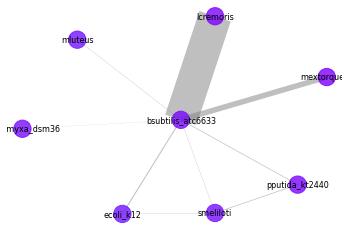

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the model 
df = pd.read_csv(f'{DATA}/community_examples/example_detailed.tsv', sep='\t')

# Create an empty graph
G = nx.Graph()

# Add nodes and edges to the graph
for _, row in df.iterrows():
    receiver = row[2]
    donor = row[3]
    compound = row[4]
    smetana = row[8]
    G.add_edge(receiver, donor, compound=compound, smetana=smetana)

# Generate a layout for the graph
pos = nx.spring_layout(G)

# Create a colormap based on the receiver column
receivers = set(df['receiver']).union(set(df['donor']))
colors = plt.cm.rainbow(range(len(receivers)+1))
receiver_color_map = dict(zip(list(receivers)+['compound'], colors))

# Draw nodes and edges with labels and sizes
for (u, v, d) in G.edges(data=True):
    compound = d["compound"]
    smetana = d["smetana"]
    edge_size = smetana * 100  # Scale edge size

    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=[(u, v)],
        width=edge_size,
        alpha=0.5,
        edge_color="gray", 
    )

nx.draw_networkx_nodes(
    G,
    pos,
    node_color=[receiver_color_map[node] for node in G.nodes()],
    node_size=300,
    alpha=0.8,
)

nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

# Show the plot
plt.axis("off")
plt.show()

**Exercise** : what are your conclusions based on this network?

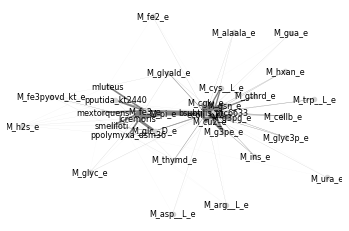

In [ ]:
# Create an empty graph
G = nx.Graph()

# Add edges between receiver and donor nodes
for index, row in df.iterrows():
    receiver = row['receiver']
    donor = row['donor']
    smetana = row['smetana']*10
    compound = row['compound']
    
    G.add_node(compound)
    G.add_node(receiver)
    G.add_node(donor)

    G.add_edge(receiver, compound, weight=smetana)
    G.add_edge(compound, donor, weight=smetana)


# Create a layout for the graph
pos = nx.spring_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=20)

# Draw edges
edge_sizes = [data['weight'] for u, v, data in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=edge_sizes, edge_color='gray')

# Add labels to nodes
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# Show the plot
plt.axis('off')
plt.show()

**Exercise** : go through the previous code and explain what are we plotting in the plot above

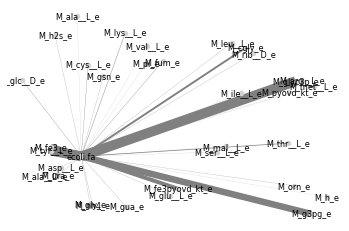

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


# Create an empty graph
G = nx.Graph()

# Add edges between receiver and donor nodes
for index, row in df.iterrows():
    receiver = row['receiver']
    donor = row['donor']
    smetana = row['smetana']*10
    compound = row['compound']
    
    if donor=='ecoli_k12':
        G.add_node(compound)
        G.add_node(donor)
        G.add_edge(compound, donor, weight=smetana)


# Draw nodes
pos = nx.random_layout(G)

nx.draw_networkx_nodes(G,  pos, node_color='lightgray', node_size=20)

# Draw edges
edge_sizes = [data['weight'] for u, v, data in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=edge_sizes, edge_color='gray')

# Add labels to nodes
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# Show the plot
plt.axis('off')
plt.show()

##### 2.5.4.3.2 Heatmaps

Heatmaps are also useful data representations, we can use seaborn to quickly plot the number of compounds shared between individuals in the community:

In [ ]:
# Pivot the DataFrame to count the number of compounds shared between donors and receivers
heatmap_data = df.pivot_table(index='donor', columns='receiver', values='compound', aggfunc='count', fill_value=0)
heatmap_data

receiver,bsubtilis_atc6633,ecoli_k12,smeliloti
donor,,,
ecoli_k12,25,0,0
lcremoris,5,0,0
mextorquens,5,0,0
mluteus,6,0,0
ppolymyxa_dsm36,10,0,0
pputida_kt2440,5,0,5
smeliloti,4,4,0


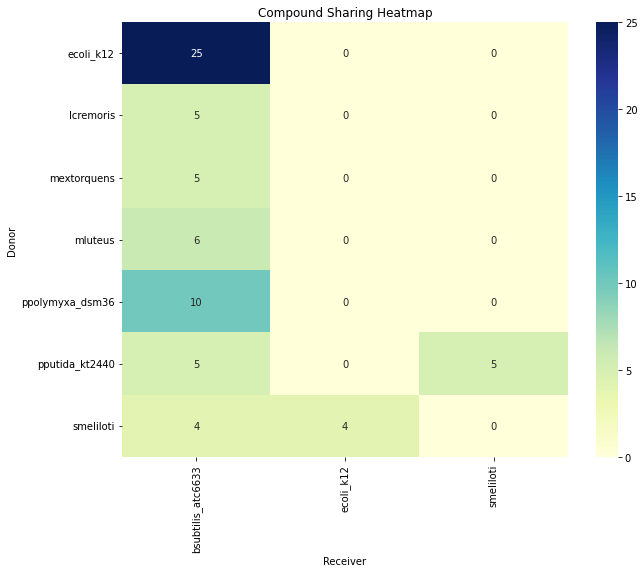

In [ ]:
import seaborn as sns

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Compound Sharing Heatmap')
plt.xlabel('Receiver')
plt.ylabel('Donor')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**Exercise** : What are the conclusion from the previous graph?

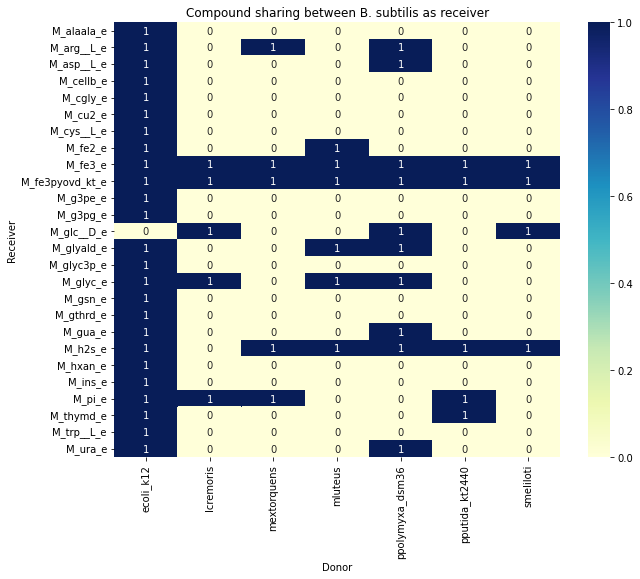

In [ ]:
# Pivot the DataFrame to count the number of compounds shared between donors and receivers
heatmap_data = df[df['receiver']=='bsubtilis_atc6633'].pivot_table(index='compound', columns='donor', values='smetana', aggfunc='count', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Compound sharing between B. subtilis as receiver')
plt.xlabel('Donor')
plt.ylabel('Receiver')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**Exercise** :
- Are there compounds given by E. coli taken by the other two members?
- Are there any compound only taken by another member? 

----------------

# 3. HMMs-based approaches

Core concepts: Run multiple HMMs on a collection of sequences, explore concepts such as cluster completeness, and further developments such as antismash.

We will use the operon Nif as example, important because of the process of nitrogen fixation:

- Nitrogen is a limiting nutrient for plants, and although it makes up ~70% of the atmosphere, the gaseous form (N2) is unusable for them.
- So how does nitrogen get from the atmosphere into a usable form? → “nitrogen fixation”
  - bacteria can convert N2 into organic nutrients like ammonium (NH4+) and nitrate (NO3–) that are usable by plants. 
  - in the ocean, blue-green cyanobacteria are the most abundant type of bacteria to fix nitrogen. 
- Collectively, these organisms are called diazotrophs, and account for ~90% of natural nitrogen fixation.

This process involves 3 main genes:

![title](img/nifHDK.png)

We have produced HMMs for a series of H, D, K proteins. Given the long evolutionary history of these proteins, Blast cannot capture all the diversity and HMMs, with their higher sensitivity, can help in predicting diazotrophs in our genome collection.

To work with HMMs, we will us the python module for HMMER pyhmmer.

In [ ]:
import pandas as pd
import pyhmmer
import glob
import pyhmmer.easel as easel
import collections

def retrieve_hits(seqs_path, hmms, fields=["query", "subject", "bitscore", "evalue"]):

    # Load cluster proteins
    with pyhmmer.easel.SequenceFile(seqs_path, digital=True, alphabet=easel.Alphabet.amino()) as seqs_file:
        proteins = seqs_file.read_block()

    # Run HMMs
    Result = collections.namedtuple("Result", fields)

    results = []
    for hits in pyhmmer.hmmsearch(hmms, proteins, E=1):
        cog = hits.query_name.decode()
        for hit in hits:
            if hit.included:
                results.append(Result(hit.name.decode(), cog, hit.score, hit.evalue))

    # Results --> df
    hits_df = {}
    c = 0
    for i in results:
        hits_df[c] = list(i)
        c += 1
    hits_df = pd.DataFrame.from_dict(hits_df, orient='index', columns=fields)
    
    return hits_df

**Exercise**: What is the previous code doing? 

In [ ]:
# Find and load a collection of HMMs
HMMS = []
for fil in glob.glob(f'{DATA}/hmms_nifHDK/*.hmm'):
    with pyhmmer.plan7.HMMFile(fil) as hmm_file:
        HMMS.append(hmm_file.read())
HMMS

In [ ]:
results = retrieve_hits(f'{DATA}/omd2_candidate.faa', HMMS)
results

Do you think this bacteria is a diazotroph?

Let's try a different set:

In [ ]:
retrieve_hits(f'{DATA}/cyanobact.faa', HMMS)

Do you think this bacteria is a diazotroph?
- Does it has the 3 genes? 
- What would be your interpretation from the raw predictions? 
- What do you think has happened here evolutionary speaking? 
- What would be your interpretation from the predictions with evalue<5e-10? 
- What else you could try to validate your hypothesis?

Additional:
- The E-value is the number of expected hits of similar quality (score) that could be found just by chance.
- The bit-score is the required size of a sequence database in which the current match could be found just by chance.

## 3.2. Working with antismash outputs

Exercise: Given the antismash output from a genome given in the previous file:
- How many BGCs the genome has?
- What are the different products of those BGCs?
- How many of each? 
- How many present a regulatory, resistance	or transport gene? 
- You can produce some graphs to inspect the problem if you are done quick ;) 

In [ ]:
antismash = pd.read_csv(f'{DATA}/omd2_candidate-antismash.tsv', sep='\t')
antismash.head(10)

## 3.3. Working with merged antismash outputs

In [ ]:
omd_bgcs = pd.read_csv(f'{DATA}/bgcs.csv.gz', compression='gzip')
omd_bgcs['biosample'] = [i.split('_')[1] for i in omd_bgcs['GENOME']]

In [ ]:
omd_bgcs

**Exercise**:

Go to https://omd-v2.microbiomics.io/repository/ocean/bg-clusters :
- Filter high quality mags (completion >= 90, contamination <5) from the BGC table. 
- Which is the GTDB taxonomy with largest number of Biosynthetic Regions?.

## 3.4. Working with EggNOG outputs

In [ ]:
import pandas as pd
egg = pd.read_csv(f'{DATA}/eggnog_output.tsv', sep='\t')

**Exercise:**
1. Explore together the eggnog output
2. Make a function to parse the PFAM column subsetting Eukaryotic-like proteins
    - ankyrin repeat
    - tetratrico peptide repeat
    - tetratricopeptide repeat
    - WD40 region
    - WD40-like
    - Leucine-rich repeat
3. What percentage of the total gene collection are ELPs? 

_Note_ use <your_str>.lower() or <your_str>.upper() to ensure the match is case insensitive! 

In [3]:
egg

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
0,RMDv1_0000000000,365046.Rta_22840,6.170000e-286,993.0,"COG2982@1|root,COG3210@1|root,COG5295@1|root,C...",1224|Proteobacteria,U,6-phosphogluconolactonase activity,-,-,...,-,-,-,-,-,-,-,-,-,"Autotransporter,Cadherin_3,DUF11,DUF4347,He_PI..."
1,RMDv1_0000000001,400682.PAC_15710479,3.740000e-62,250.0,"29RY4@1|root,2RXCD@2759|Eukaryota",2759|Eukaryota,-,-,-,-,...,-,-,-,-,-,-,-,-,-,"REJ,Tetraspannin"
2,RMDv1_0000000002,400682.PAC_15720836,0.000000e+00,5660.0,"2CAHM@1|root,2S38J@2759|Eukaryota,3AGB1@33154|...",33154|Opisthokonta,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,RMDv1_0000000003,400682.PAC_15720836,0.000000e+00,5128.0,"2CAHM@1|root,2S38J@2759|Eukaryota,3AGB1@33154|...",33154|Opisthokonta,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,RMDv1_0000000004,1278073.MYSTI_02092,0.000000e+00,8330.0,"COG1020@1|root,COG1020@2|Bacteria,1QK4F@1224|P...",28221|Deltaproteobacteria,Q,non-ribosomal peptide synthetase,-,-,...,-,-,-,-,-,-,-,-,-,"AMP-binding,AMP-binding_C,Condensation,PP-bind..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,RMDv1_0000004089,1254432.SCE1572_13250,2.020000e-282,944.0,"COG0001@1|root,COG0604@1|root,COG1020@1|root,C...",28221|Deltaproteobacteria,Q,Short-chain dehydrogenase reductase SDR,-,-,...,-,-,-,-,-,-,-,-,-,"AMP-binding,AMP-binding_C,Acyl_transf_1,Conden..."
3991,RMDv1_0000004090,176279.SERP2392,3.930000e-124,449.0,"COG1404@1|root,COG3266@1|root,COG5604@1|root,C...",91061|Bacilli,O,PFAM glycoside hydrolase family 39,bhp,-,...,ko:K20276,"ko02024,map02024",-,-,-,"ko00000,ko00001",-,-,-,"Gram_pos_anchor,He_PIG,Peptidase_M30,YSIRK_signal"
3992,RMDv1_0000004091,1123288.SOV_5c00530,1.050000e-44,189.0,"COG3210@1|root,COG3210@2|Bacteria,1U3AW@1239|F...",909932|Negativicutes,U,domain protein,-,-,...,-,-,-,-,-,-,-,-,-,"Glug,Haemagg_act"
3993,RMDv1_0000004092,323261.Noc_2169,7.420000e-38,164.0,"COG1404@1|root,COG1404@2|Bacteria,1RDZC@1224|P...",1236|Gammaproteobacteria,O,Subtilase family,-,-,...,-,-,-,-,-,-,-,-,-,Peptidase_S8


In [ ]:
import pandas as pd

# Define function to check if a gene is an Eukaryotic-like protein (ELP)
def is_elp(pfam_string):
    elp_keywords = [
        "ankyrin repeat", 
        "tetratrico peptide repeat", 
        "tetratricopeptide repeat", 
        "wd40 region", 
        "wd40-like", 
        "leucine-rich repeat"
    ]
    
    # Ensure case insensitivity
    pfam_string = pfam_string.lower() if isinstance(pfam_string, str) else ""

    # Check if any of the keywords are in the PFAM column
    return any(keyword in pfam_string for keyword in elp_keywords)

# Add a column indicating whether the gene is an ELP
egg["Is_ELP"] = egg["Description"].apply(is_elp)
# You can also apply this to PFAM, description and pfam not always match!

# Compute the percentage of ELPs
total_genes = len(egg)
elp_count = egg["Is_ELP"].sum()
elp_percentage = (elp_count / total_genes) * 100

# Print the results
print(f"Total genes: {total_genes}")
print(f"Eukaryotic-like proteins (ELPs): {elp_count}")
print(f"Percentage of ELPs: {elp_percentage:.2f}%")

Total genes: 3995
Eukaryotic-like proteins (ELPs): 51
Percentage of ELPs: 1.28%


Is this a lot or not? Next step would be to repeat the same experiment with free living bacteria, for example from OMD2.

----------

# 4. Feature based approaches 

## 4.1. Defining a Random Forest Classifier to identify AMPs

Sometimes the features in a protein that allow for a specific function are not given based the sequence but other composed factors, such as hydrophobicity, secondary structure motifs, a single reactive amino acid, etc. 

For these cases, machine learning and feature-based approaches can be integrated to integrate and analyze based on a composition of numerical descriptors. Antimicrobial peptides are one of the classic examples:

In [ ]:
from Bio import SeqIO
import pandas as pd
import peptides

# Define a function to load sequences from a FASTA file
def load_sequences(fasta_file):
    sequences = {}
    for record in SeqIO.parse(fasta_file, "fasta"):
        sequences[record.id] = str(record.seq)
    return sequences


In [ ]:
# Load sequences from the fasta file
training_seqs = load_sequences(f"{DATA}/amps/training_set.faa")  # Positive AMP sequences
training_seqs

Explore and interpret together the output. What does AMP and NAMP mean? 

Now check the code below and understand what it does:

In [ ]:
aas = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
cols = ['aliphatic_index', 'boman', 'charge'] + [f'count_{i}' for i in aas] + [f'freq_{i}' for i in aas] 
cols += ['hydrophobic_moment', 'hydrophobicity', 'instability_index', 'isoelectric_point', 'mass_shift']
cols += ['molecular_weight', 'mz']
def predict_additional(peptide):
    aas = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
    l = [peptide.aliphatic_index(), peptide.boman(), peptide.charge()]+[peptide.counts().get(i) for i in aas]+[peptide.frequencies().get(i) for i in aas]
    l += [peptide.hydrophobic_moment(), peptide.hydrophobicity(), peptide.instability_index(), peptide.isoelectric_point(), peptide.mass_shift()]
    l += [peptide.molecular_weight(), peptide.mz() ]
    additional_feats = {k:v for k, v in zip(cols, l)}
    return additional_feats

def featurize_seq(seq):
    peptide = peptides.Peptide(seq)
    feats = peptide.descriptors()
    feats.update(predict_additional(peptide))
    return feats

In [ ]:
featurize_seq('MGMRMMFTVFLLVVLATTVVSIPSDRASDGRNAVVHERAPELVVTATTNCCGYNPMTICPPCMCTYSCPPKRKPGRRND')

Work together in producing code for the following:

In [ ]:
training_seqs = load_sequences(f"{DATA}/amps/training_set.faa")  # Positive AMP sequences

# Predict features for all the training sequences
df = pd.DataFrame.from_dict({k:featurize_seq(v) for k, v in training_seqs.items()}, orient='index')
df

In [ ]:
# Add a label +/-
df['label'] = [0 if 'NAMP' in i else 1 for i in df.index]
df

Step 3: Train a Random Forest Model

With the features prepared, we can split the data and train a Random Forest classifier.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"]

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest model training complete.")


To evaluate the model, we’ll plot the ROC curve using scikit-learn and matplotlib.

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the validation set
y_probs = rf_model.predict_proba(X_val)[:, 1]  # Probability of the positive class

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 4.2. Test the Model on New Data

Now, we can use the model to predict labels for the test sequences.

In [ ]:
# Extract features from the test sequences
to_test = load_sequences(f"{DATA}/amps/test_set.faa")  # Positive AMP sequences

# Predict features for all the training sequences
df2 = pd.DataFrame.from_dict({k:featurize_seq(v) for k, v in to_test.items()}, orient='index')

# Predict the probability of each test sequence being positive
test_probs = rf_model.predict_proba(df2)[:, 1]
test_predictions = rf_model.predict(df2)

# Display predictions
for i, seq in enumerate(to_test):
    print(f"Sequence: {seq}")
    print(f"Prediction: {'Positive' if test_predictions[i] == 1 else 'Negative'}")
    print(f"Probability of being AMP: {test_probs[i]:.2f}\n")


Exercise: think about potential visualizations of this data. What information could be relevant to highlight? 


## 4.3. Exploring importances from a RF model

**Exercise 1**: Identify and Visualize the Top 10 Most Important Features

In this exercise, you’ll identify the top 10 most important features in the Random Forest model and visualize them to understand which features are most predictive of the positive class.

    Calculate Feature Importance: Use the feature_importances_ attribute of the trained Random Forest model to get the importance scores of each feature.
    Visualize the Top 10 Features: Plot a bar chart to show the importance of each feature.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the model
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
top_features = sorted_idx[:10]
top_feature_names = [feature_names[i] for i in top_features]
top_feature_importances = feature_importances[top_features]

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names[::-1], top_feature_importances[::-1], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.title("Top 10 Most Important Features")
plt.show()


**Exercise 2**: Compare Top Features between Positive and Negative Sets

For the top 10 features identified, compare their distributions between the positive and negative sets. This helps you understand how these features differ across classes.

Subset the Top Features: Select only the top 10 features from the data DataFrame.
Plot Feature Distributions: For each of the top features, create a boxplot or violin plot to compare the distributions between positive and negative sets.

In [ ]:
import seaborn as sns

# Subset data to include only top 10 features and labels
top_features_data = df2[top_feature_names]
top_features_data['label'] = test_predictions

# Plot each feature as a boxplot to compare distributions in positive vs. negative sets
plt.figure(figsize=(12, 10))
for i, feature in enumerate(top_feature_names, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='label', y=feature, data=top_features_data, palette=["#FFA07A", "#8FBC8F"])
    plt.title(f"Distribution of {feature} by Class")
    plt.xlabel("Class (0 = Negative, 1 = Positive)")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


Explanation: 
- Feature Importance Plot: The bar chart shows the importance of each feature in distinguishing between classes, based on the Random Forest model.
- Boxplots: Each boxplot displays the distribution of values for a given feature, with classes 0 (negative) and 1 (positive) shown separately.

Additional Questions for Analysis

- Which features show a clear separation between positive and negative sets?
- Do any of the top features overlap heavily, indicating they may not be strong discriminators?
- Can you hypothesize why certain features are predictive of positive or negative classes?

#### Additional: statistical tests

In [ ]:
subdf = top_features_data[['label']+top_feature_names]
subdf

In [ ]:
from scipy.stats import mannwhitneyu

for i in top_feature_names:
  U1, p = mannwhitneyu(subdf[subdf['label']==1][i], subdf[subdf['label']==0][i], method="exact")
  print(i, p)